# 因子分析

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

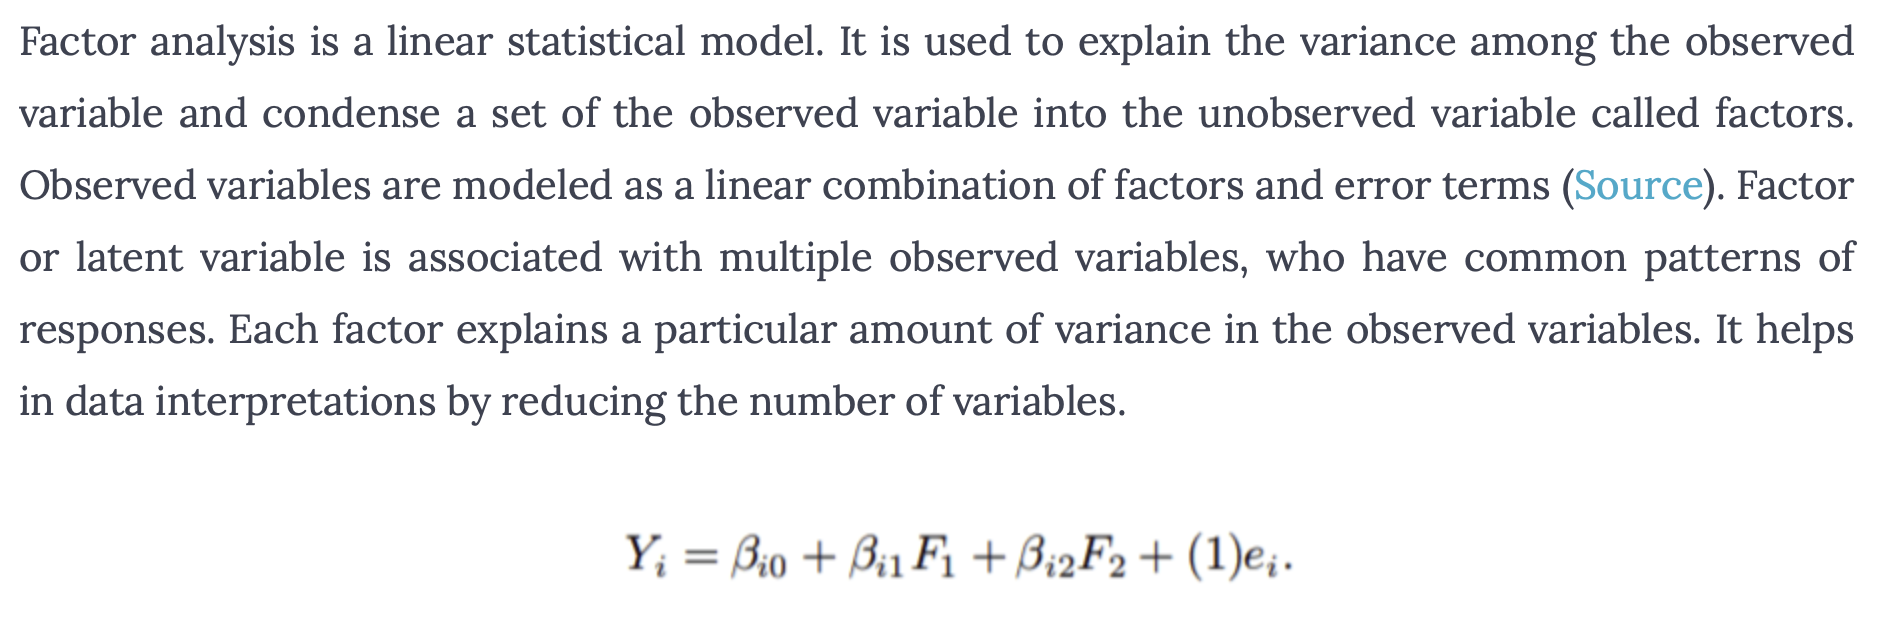

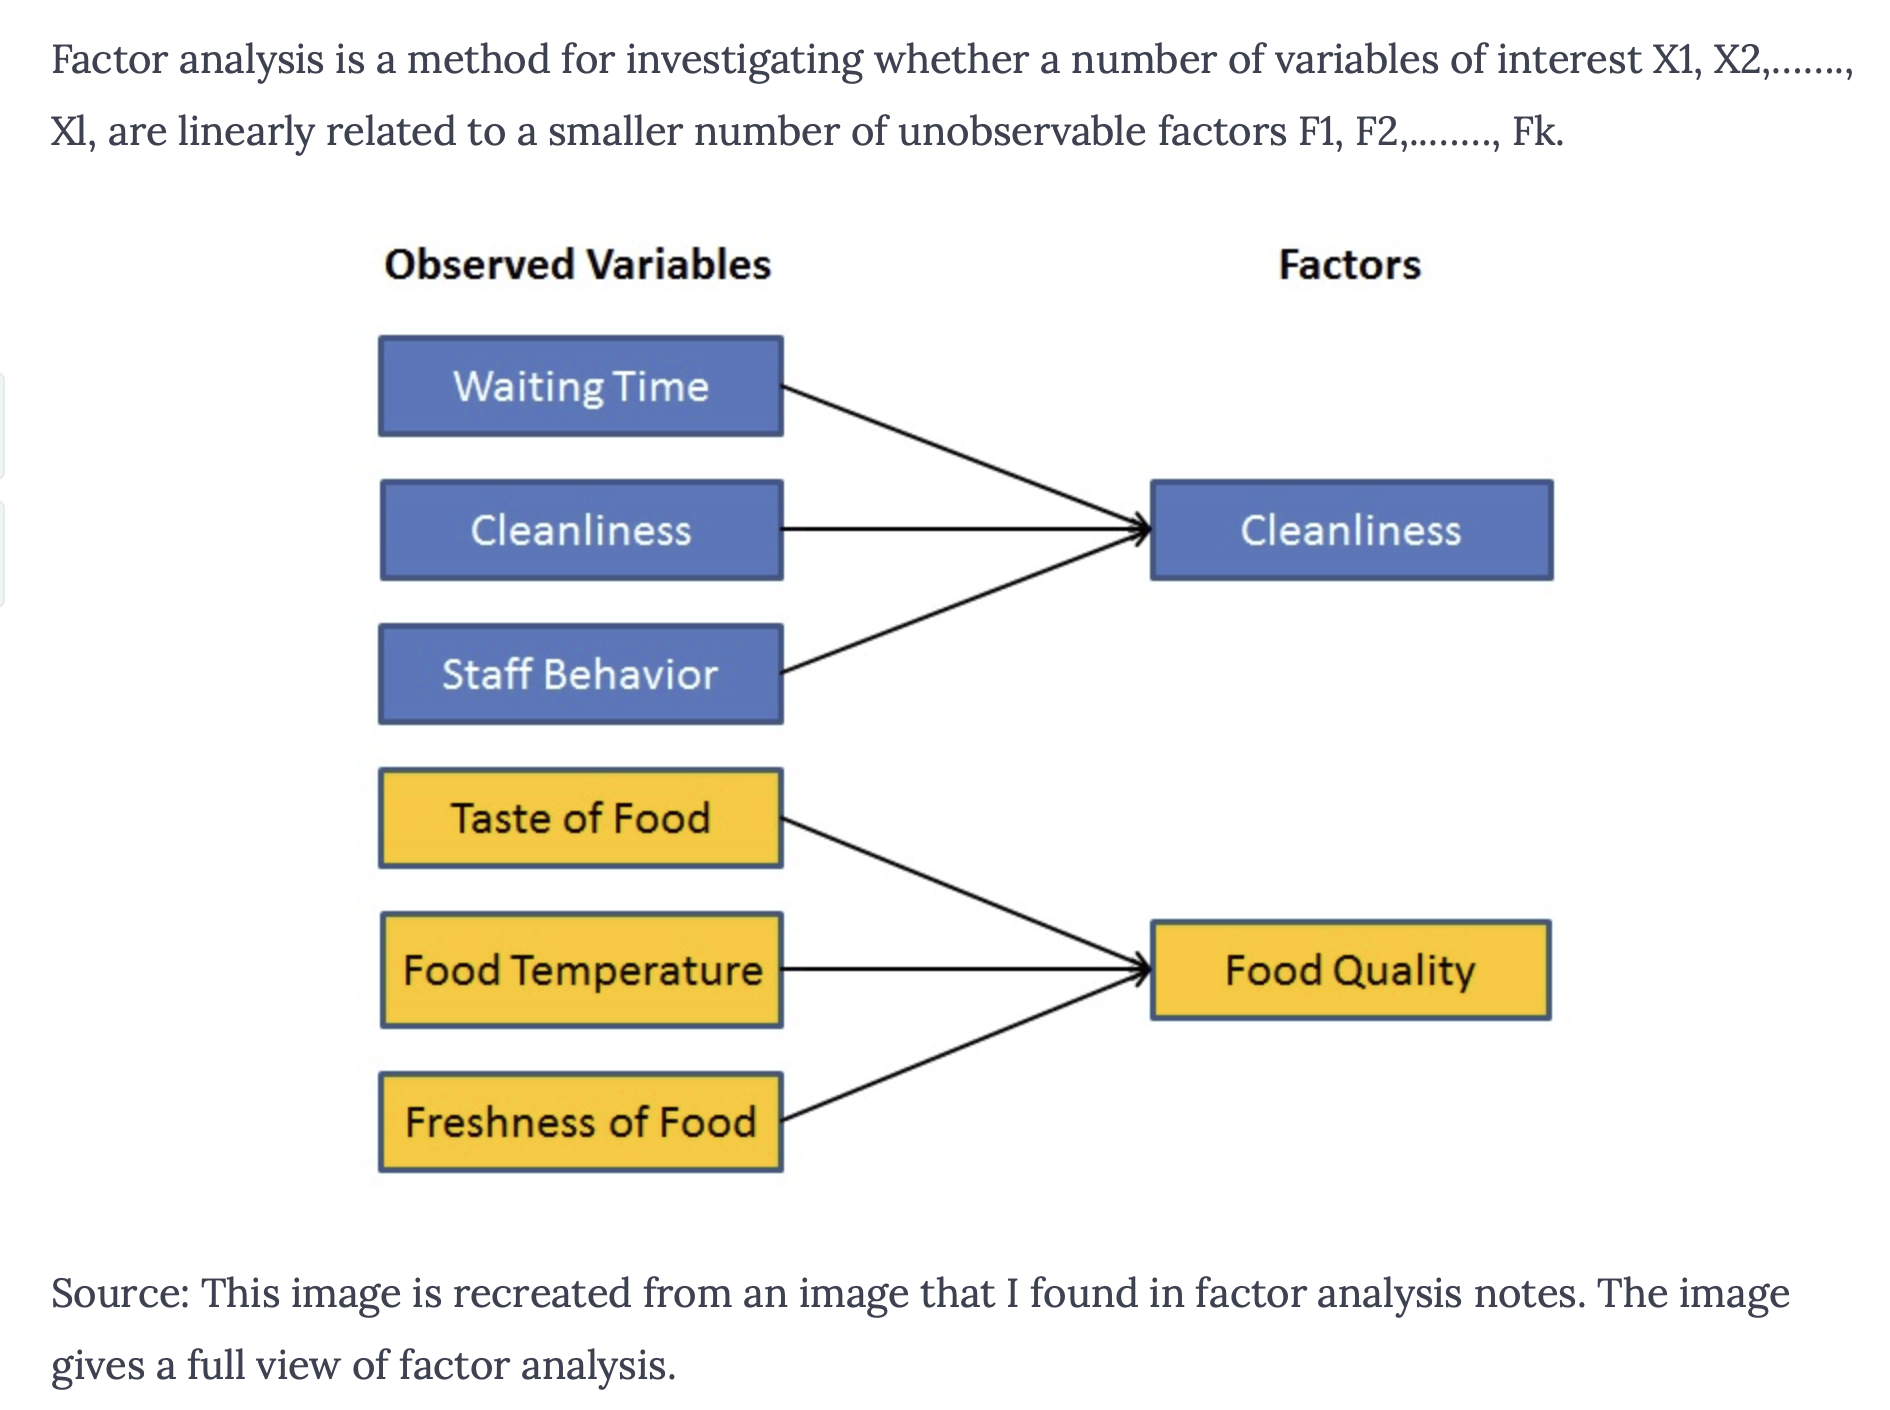

# 代码实现

库：# pip install factor_analyzer==0.2.3

In [1]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("bfi.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [4]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [5]:
# Dropping missing values rows
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
Unnamed: 0    2436 non-null int64
A1            2436 non-null float64
A2            2436 non-null float64
A3            2436 non-null float64
A4            2436 non-null float64
A5            2436 non-null float64
C1            2436 non-null float64
C2            2436 non-null float64
C3            2436 non-null float64
C4            2436 non-null float64
C5            2436 non-null float64
E1            2436 non-null float64
E2            2436 non-null float64
E3            2436 non-null float64
E4            2436 non-null float64
E5            2436 non-null float64
N1            2436 non-null float64
N2            2436 non-null float64
N3            2436 non-null float64
N4            2436 non-null float64
N5            2436 non-null float64
O1            2436 non-null float64
O2            2436 non-null int64
O3            2436 non-null float64
O4            2436 non-null float

In [7]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


## Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
* Bartlett’s Test
* Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. 

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18184.306307820552, 0.0)

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [10]:
kmo_model

0.8483267027192358

## Choosing the Number of Factors

In [11]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,5.134580
1,2.753375
2,2.148142
3,1.852506
4,1.548463
5,1.110662
6,0.980677
7,0.824309
8,0.795162
9,0.718290


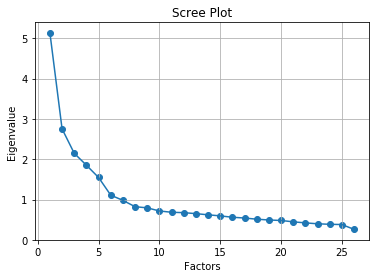

In [13]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Performing Factor Analysis

In [14]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation="varimax")

In [15]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Unnamed: 0,-0.032472,-0.022903,0.033169,0.003795,-0.038093,0.103748
A1,0.060474,0.099396,0.026694,-0.120309,-0.530785,0.163638
A2,0.259875,0.031767,0.140226,0.055770,0.646569,-0.097050
A3,0.408849,-0.005256,0.109534,0.016184,0.587004,0.039149
A4,0.255342,-0.079266,0.229308,-0.136293,0.391760,0.033401
A5,0.491049,-0.143645,0.085649,0.009111,0.451090,0.105888
C1,0.123647,0.005623,0.540150,0.183458,0.004221,0.138798
C2,0.106505,0.084358,0.652496,0.079203,0.056538,0.208580
C3,0.049796,-0.033946,0.545877,-0.012372,0.100286,0.054480
C4,0.008989,0.231617,-0.672785,-0.153451,-0.089980,0.226977


In [16]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
Unnamed: 0,-0.061703,-0.019246,0.034865,0.014345,-0.018678
A1,0.030705,0.106455,0.027567,-0.074133,-0.429612
A2,0.227127,0.028693,0.141159,0.064117,0.621801
A3,0.329927,0.005335,0.115928,0.061647,0.642856
A4,0.209217,-0.069443,0.235418,-0.108647,0.431241
A5,0.397690,-0.129002,0.097901,0.075363,0.528159
C1,0.048297,0.009548,0.548276,0.212169,0.041194
C2,0.014459,0.089975,0.650304,0.116582,0.105693
C3,0.010825,-0.030243,0.555781,-0.004812,0.114165
C4,-0.039326,0.240794,-0.633576,-0.109695,-0.041462


* Factor 1 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
* Factor 2 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
* Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
* Factor 4 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
* Factor 5 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
* Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.

In [17]:
# Get variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.428049,2.736109,2.082504,1.549502,1.800505
Proportion Var,0.093387,0.105235,0.080096,0.059596,0.069250
Cumulative Var,0.093387,0.198621,0.278718,0.338314,0.407564
